In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
df=pd.read_excel('AQI_data.xlsx')


In [3]:
df.head()


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Delhi,2017-09-26,66.12,114.15,23.12,27.52,18.35,34.54,0.60,7.13,30.45,0.25,1.38,0.13,131,Moderate
1,Delhi,2017-09-27,80.94,125.39,26.98,21.39,22.31,50.34,0.61,6.62,29.26,0.35,1.74,0.12,165,Moderate
2,Delhi,2017-09-28,75.40,102.91,50.72,38.55,23.52,54.37,0.43,6.08,34.06,0.27,1.54,0.11,176,Moderate
3,Delhi,2017-09-29,89.38,140.94,37.45,29.45,18.61,41.19,0.45,7.17,40.26,0.44,1.82,0.13,172,Moderate
4,Delhi,2017-09-30,74.20,125.73,21.10,26.08,8.59,44.10,0.30,6.64,38.44,0.22,1.73,0.10,137,Moderate


In [4]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        1010 non-null   object        
 1   Date        1010 non-null   datetime64[ns]
 2   PM2.5       1010 non-null   float64       
 3   PM10        1010 non-null   float64       
 4   NO          1010 non-null   float64       
 5   NO2         1010 non-null   float64       
 6   NOx         1010 non-null   float64       
 7   NH3         1010 non-null   float64       
 8   CO          1010 non-null   float64       
 9   SO2         1010 non-null   float64       
 10  O3          1010 non-null   float64       
 11  Benzene     1010 non-null   float64       
 12  Toluene     1010 non-null   float64       
 13  Xylene      1010 non-null   float64       
 14  AQI         1010 non-null   int64         
 15  AQI_Bucket  1010 non-null   object        
dtypes: datetime64[ns](1), fl

In [5]:
df.isnull().sum()


City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [6]:
df.nunique()


City             1
Date          1010
PM2.5          980
PM10           996
NO             922
NO2            930
NOx            952
NH3            880
CO             233
SO2            760
O3             916
Benzene        517
Toluene        922
Xylene         281
AQI            375
AQI_Bucket       5
dtype: int64

In [7]:
df['AQI_Bucket'].value_counts()


Moderate        344
Poor            256
Very Poor       214
Satisfactory    103
Severe           93
Name: AQI_Bucket, dtype: int64

[]

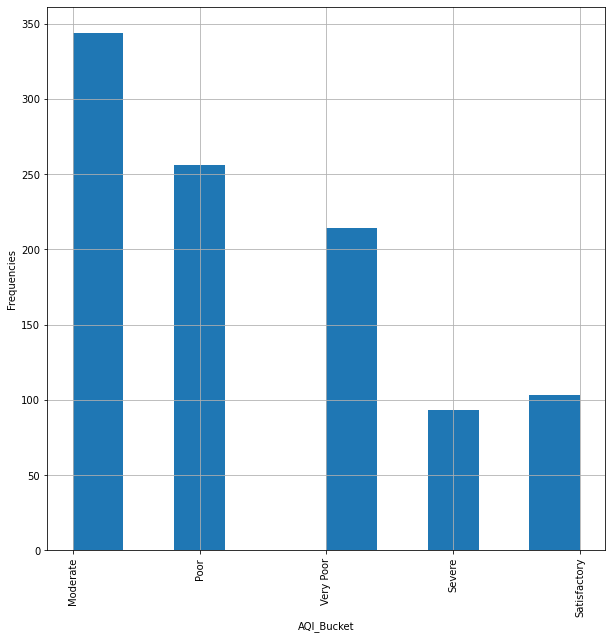

In [8]:
plt.figure(figsize=(10, 10))
plt.xticks(rotation=90)
df.AQI_Bucket.hist()
plt.xlabel('AQI_Bucket')
plt.ylabel('Frequencies')
plt.plot()


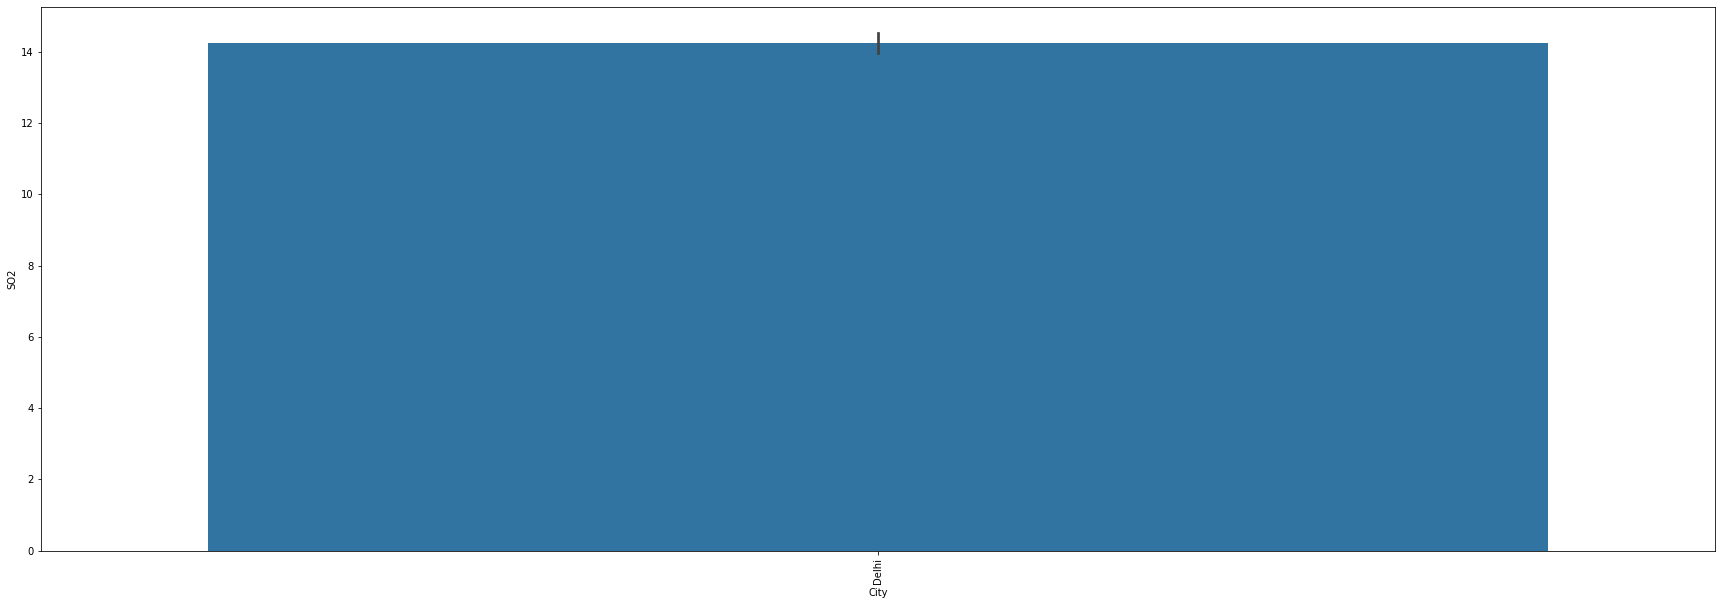

In [9]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='City',y='SO2',data=df);


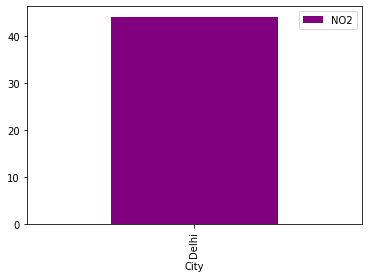

In [10]:
df[['NO2','City']].groupby(["City"]).mean().sort_values(by='NO2').plot.bar(color='purple')
plt.show()


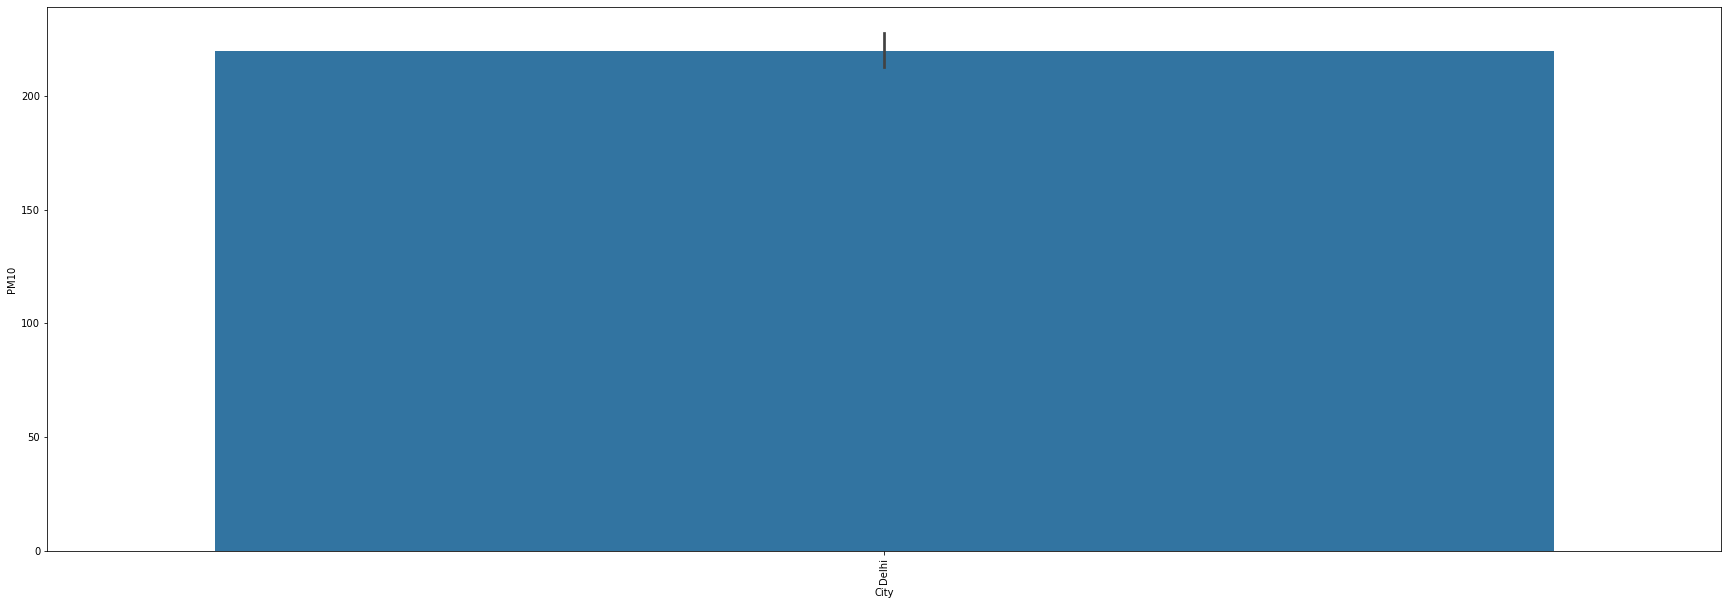

In [11]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='City',y='PM10',data=df);


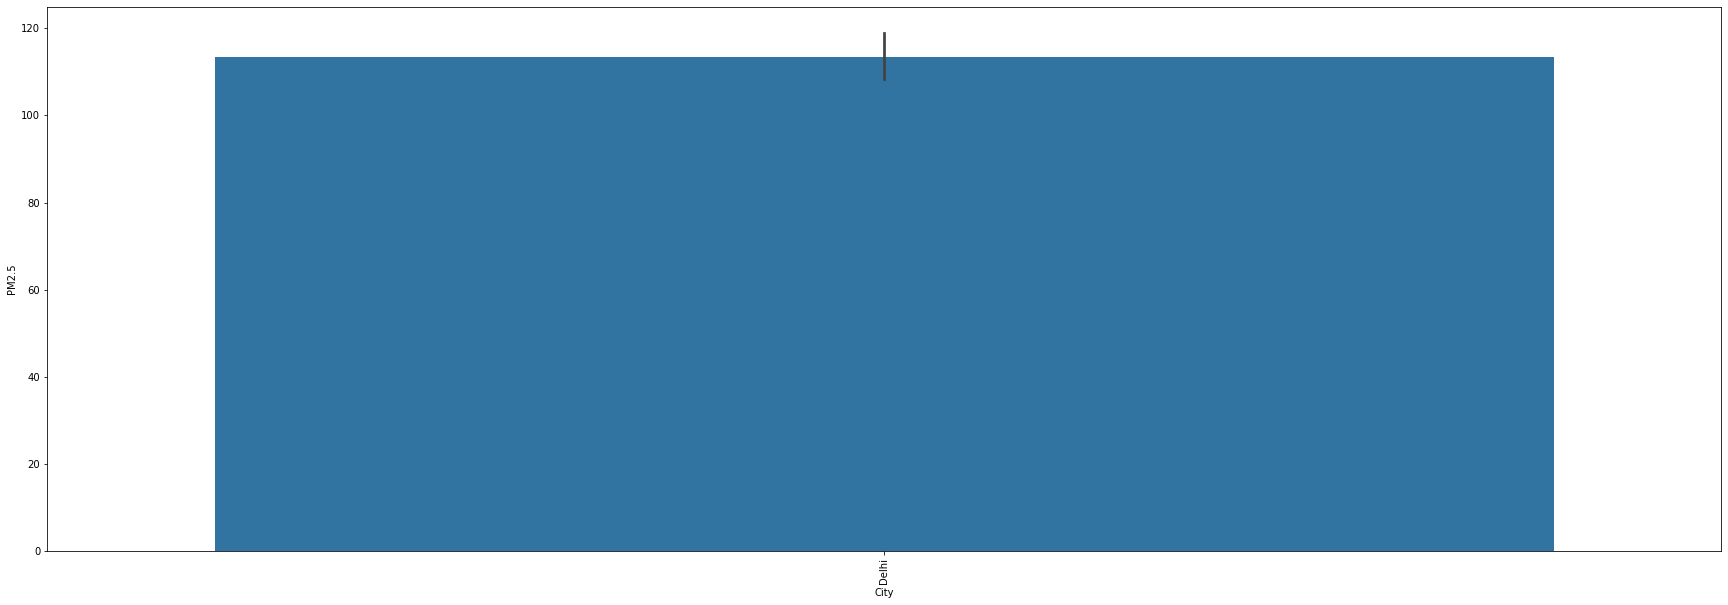

In [12]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='City',y='PM2.5',data=df);


In [13]:
nullvalues = df.isnull().sum().sort_values(ascending=False)
nullvalues

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [14]:
df.drop(['Date'],axis=1,inplace=True)
df.drop(['City'],axis=1,inplace=True)
df.drop(['AQI_Bucket'],axis=1,inplace=True)



In [15]:
df.isnull().sum()


PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
dtype: int64

In [16]:
df

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,66.12,114.15,23.12,27.52,18.35,34.54,0.60,7.13,30.45,0.25,1.38,0.13,131
1,80.94,125.39,26.98,21.39,22.31,50.34,0.61,6.62,29.26,0.35,1.74,0.12,165
2,75.40,102.91,50.72,38.55,23.52,54.37,0.43,6.08,34.06,0.27,1.54,0.11,176
3,89.38,140.94,37.45,29.45,18.61,41.19,0.45,7.17,40.26,0.44,1.82,0.13,172
4,74.20,125.73,21.10,26.08,8.59,44.10,0.30,6.64,38.44,0.22,1.73,0.10,137
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,39.80,155.94,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,0.43,112
1006,59.52,308.65,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,1.74,196
1007,44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,1.13,233
1008,39.80,91.98,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,0.49,114


In [17]:
df.isnull().sum()

PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
dtype: int64

In [18]:
df


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,66.12,114.15,23.12,27.52,18.35,34.54,0.60,7.13,30.45,0.25,1.38,0.13,131
1,80.94,125.39,26.98,21.39,22.31,50.34,0.61,6.62,29.26,0.35,1.74,0.12,165
2,75.40,102.91,50.72,38.55,23.52,54.37,0.43,6.08,34.06,0.27,1.54,0.11,176
3,89.38,140.94,37.45,29.45,18.61,41.19,0.45,7.17,40.26,0.44,1.82,0.13,172
4,74.20,125.73,21.10,26.08,8.59,44.10,0.30,6.64,38.44,0.22,1.73,0.10,137
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,39.80,155.94,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,0.43,112
1006,59.52,308.65,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,1.74,196
1007,44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,1.13,233
1008,39.80,91.98,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,0.49,114


In [19]:
from sklearn.svm import SVR

data = df

x = data.iloc[:, 0:12].values 
y = data.iloc[:, 12].values


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)
model = SVR(kernel='linear')

# Fitting the SVR model to the data
model.fit(x_train, y_train)

SVR(kernel='linear')

In [21]:
# Predicting the target values of the test set
y_pred = model.predict(x_test)



In [22]:
y_pred = model.predict(x_test)

In [23]:
y_pred

array([254.34049052, 135.2468277 , 128.67692538,  99.96754501,
        94.90978168,  91.54681641, 207.61174344, 293.04679239,
       156.16018465, 104.99821882, 222.71599521, 161.37404059,
       168.6692554 , 171.32152788, 148.72266767, 208.62014392,
        71.55733374, 453.43738368, 229.42150857, 213.95463635,
       282.51459764, 240.49291197, 320.66625976,  88.57416017,
       132.47135591, 254.58152449, 200.29235532, 101.16938805,
       223.78312642, 179.65344498, 118.54193586, 154.2663058 ,
       119.11415874, 202.64853399, 273.93835624, 171.71506365,
        90.9489751 , 159.19359897, 379.60401127, 170.87255693,
       176.8914607 , 199.5482164 , 137.6623463 , 129.49497899,
       281.81306914, 245.79135217, 176.0732267 , 337.12307965,
       385.60955139, 410.10617   , 433.08860025, 268.61023455,
       270.85302092, 135.36091971, 180.33782675, 228.48495481,
       192.91904623, 139.92380894, 385.62221429, 198.03708044,
       161.76630974, 401.75814426, 265.48876069, 364.51

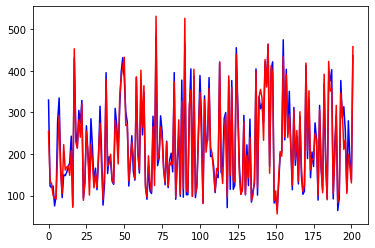

In [24]:
plt.plot(y_test,color="blue")
plt.plot(y_pred,color="red")

In [25]:
a=[[66.12,114.15,23.12,27.52,18.35,34.54,0.6,7.13,30.45,0.25,1.38,0.13]]
arr = np.array(a)
prediction=model.predict(arr)

In [26]:
prediction

array([143.93112879])

In [27]:
model.score(x,y)

0.9159706972434531

In [29]:
r2_score(y_test,y_pred)

0.9468491946791753